In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path=r'OnlineRetail.xlsx'

In [3]:
data=pd.read_excel(data_path,sheet_name='Online Retail')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data=data.loc[data['Quantity']>0] #Removing zero quantity products may be return products

In [7]:
data.shape

(531285, 8)

In [8]:
data=data.loc[~data['CustomerID'].isnull()] #Removing the null customerids

In [9]:
data.shape

(397924, 8)

In [10]:
#Invoice start and end date
print('Startdate',data['InvoiceDate'].min())
print('Enddate',data['InvoiceDate'].max())

Startdate 2010-12-01 08:26:00
Enddate 2011-12-09 12:50:00


In [11]:
data=data.loc[data['InvoiceDate']<'2011-12-01']

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
#calculate total sales for each invoice
data['sales']=data['Quantity']*data['UnitPrice']

In [14]:
orders_data=data.groupby(['CustomerID','InvoiceNo']).agg({'sales':sum,'InvoiceDate':max})

In [15]:
orders_data.head()

sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [16]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max()-x.min()).days

def avg_frequency(x):
    return (x.max()-x.min()).days/x.count()

groupby_mean.__name__='avg'
groupby_count.__name__='count'
purchase_duration.__name__='purchase_duration'
avg_frequency.__name__='purchase_frequency'

In [17]:
summary_data=orders_data.reset_index().groupby('CustomerID').agg({'sales':[min,max,sum,groupby_mean,groupby_count],
                                                                'InvoiceDate':[min,max,purchase_duration,avg_frequency]})

In [18]:
summary_data.head()

sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [19]:
summary_data.columns=['_'.join(col).lower() for col in summary_data.columns]

In [20]:
summary_data.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0


In [21]:
summary_data.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1     1539
2      806
3      515
4      381
5      228
6      172
7      132
8       97
9       60
10      45
11      54
12      47
13      29
14      19
15      24
16      13
17      15
18      11
19      15
20      10
Name: sales_avg, dtype: int64

In [22]:
summary_data=summary_data.loc[summary_data['invoicedate_purchase_duration']>0]

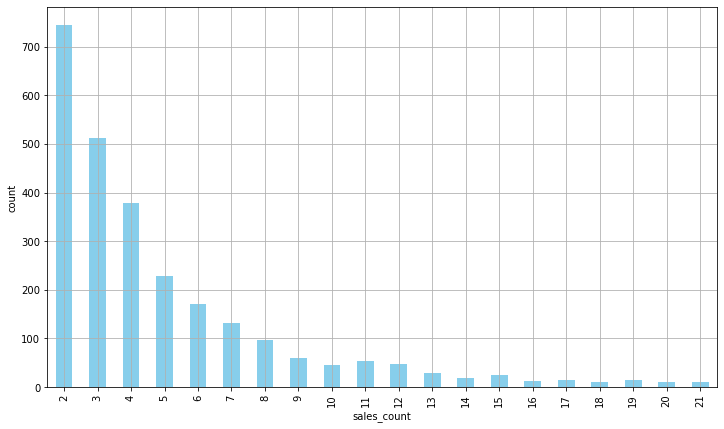

In [23]:
ax=summary_data.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar',color='skyblue',figsize=(12,7),grid=True)
ax.set_ylabel('count')
plt.show()

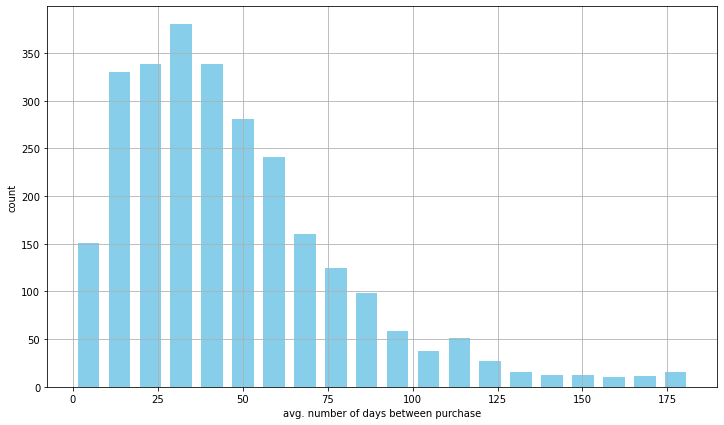

In [24]:
ax=summary_data['invoicedate_purchase_frequency'].hist(bins=20,color='skyblue',rwidth=0.7,figsize=(12,7))
ax.set_xlabel('avg. number of days between purchase')
ax.set_ylabel('count')
plt.show()

In [25]:
clv_freq='3M'
data_df=orders_data.reset_index().groupby(['CustomerID',pd.Grouper(key='InvoiceDate',freq=clv_freq)]).agg({'sales':
                                                                                                          ['sum',groupby_mean,groupby_count],})

In [26]:
data_df.columns=['_'.join(col) for col in data_df.columns]

In [27]:
data_df

sales_sum     sales_avg  sales_count
CustomerID InvoiceDate                                      
12346.0    2011-03-31    77183.60  77183.600000            1
12347.0    2010-12-31      711.79    711.790000            1
           2011-03-31      475.39    475.390000            1
           2011-06-30     1018.77    509.385000            2
           2011-09-30      584.91    584.910000            1
...                           ...           ...          ...
18283.0    2011-06-30      524.68    131.170000            4
           2011-09-30      278.09     92.696667            3
           2011-12-31      766.21    153.242000            5
18287.0    2011-06-30      765.28    765.280000            1
           2011-12-31     1072.00    536.000000            2

[9220 rows x 3 columns]

In [28]:
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [29]:
date_month_map={str(x)[:10]: 'M_%s' % (i+1) for i,x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(),reverse=True))}

In [30]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [31]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [32]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


In [33]:
features_df=pd.pivot_table(data_df.loc[data_df['M']!='M_1'],values=['sales_sum','sales_avg','sales_count'],index='CustomerID',columns='M')

In [34]:
features_df.head()

sales_avg                             sales_count                 \
M                M_2      M_3        M_4     M_5         M_2  M_3  M_4  M_5   
CustomerID                                                                    
12346.0          NaN      NaN  77183.600     NaN         NaN  NaN  1.0  NaN   
12347.0       584.91  509.385    475.390  711.79         1.0  2.0  1.0  1.0   
12348.0       310.00  367.000    227.440  892.80         1.0  1.0  1.0  1.0   
12350.0          NaN      NaN    334.400     NaN         NaN  NaN  1.0  NaN   
12352.0       316.25      NaN    312.362     NaN         2.0  NaN  5.0  NaN   

           sales_sum                             
M                M_2      M_3       M_4     M_5  
CustomerID                                       
12346.0          NaN      NaN  77183.60     NaN  
12347.0       584.91  1018.77    475.39  711.79  
12348.0       310.00   367.00    227.44  892.80  
12350.0          NaN      NaN    334.40     NaN  
12352.0       632.50      NaN   1561.81     NaN

In [35]:
features_df.columns=['_'.join(col) for col in features_df.columns]

In [36]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [37]:
response_df=data_df.loc[data_df['M']=='M_1',['CustomerID','sales_sum']]

In [38]:
response_df.columns=['CustomerID','CLV'+clv_freq]

In [39]:
sample_set_df=features_df.merge(response_df,left_index=True,right_on='CustomerID',how='left')

In [40]:
sample_set_df.fillna(0,inplace=True)

In [41]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


In [42]:
target_var='CLV3M'
all_features=[column for column in sample_set_df.columns if column not in ['CustomerID',target_var]]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(sample_set_df[all_features],sample_set_df[target_var],test_size=0.3)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
lr.intercept_

-6.475777774619814

In [49]:
lr.coef_

array([ 2.51040339e-01, -1.67411496e-01,  2.27882058e-01, -3.95899507e-01,
        8.42380804e+01,  5.55208404e+01, -1.61750567e+02,  6.48765435e+01,
        1.79402640e-01,  1.06048603e-01,  4.55144926e-01,  5.50711693e-01])

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
predicted=lr.predict(X_test)

In [52]:
r2_score(y_test,predicted)

0.4081119832918071

In [53]:
mean_squared_error(y_test,predicted)

4514032.2465199